In [181]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
import seaborn as sns


pio.renderers.default = 'vscode'

path = r"F:\Tareas Isaac\Proyecto DS1\datos_productividad.csv"

df = pd.read_csv(path , index_col=False)

df



,Department,Gender,Age,Job_Title,Hire_Date,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned
0,Finance,Male,29,Developer,2024-04-18 08:03:05.556036,0,High School,5,7500,34,34,13,14,100,12,61,2,1.72,False
1,Finance,Male,41,Specialist,2015-10-26 08:03:05.556036,8,High School,3,6404,37,27,6,3,50,10,1,0,3.17,False
2,Sin dato,Female,48,Analyst,2016-10-22 08:03:05.556036,7,Bachelor,2,4800,52,10,28,12,100,10,0,1,1.86,False
3,Engineering,Female,36,Sin dato,2021-07-23 08:03:05.556036,3,Bachelor,2,4800,38,11,29,13,100,15,9,1,1.25,False
4,IT,Male,43,Manager,2016-08-14 08:03:05.556036,8,High School,3,7800,46,31,8,0,50,15,95,0,2.77,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92978,Engineering,Female,27,Specialist,2019-07-23 08:03:05.556036,4,Bachelor,3,5400,40,29,4,1,75,13,50,0,4.68,False
92979,Operations,Male,35,Analyst,2017-08-29 08:03:05.556036,4,Bachelor,2,4800,45,15,0,10,75,16,75,2,1.88,False
92980,Sales,Male,41,Specialist,2015-02-01 08:03:05.556036,9,High School,4,6300,59,49,18,11,100,4,34,1,2.61,False
92981,Marketing,Male,33,Technician,2016-10-22 08:03:05.556036,7,Bachelor,3,4550,34,39,20,2,100,3,9,0,2.94,False


In [182]:
df['Hire_Date'] = pd.to_datetime(df['Hire_Date'])

In [183]:
categorical_columns = ['Department', 'Job_Title', 'Education_Level' , 'Gender']
for col in categorical_columns:
    df[col] = df[col].replace(['Sin dato','Other'], pd.NA)

# Imputar los valores faltantes con la moda de cada columna
for col in categorical_columns:
    mode_value = df[col].mode().iloc[0]  # Obtener la moda
    df[col].fillna(mode_value, inplace=True)

# Confirmar que los valores han sido reemplazados
print(df[categorical_columns].isnull().sum())

Department         0
Job_Title          0
Education_Level    0
Gender             0
dtype: int64


C:\Users\USER\AppData\Local\Temp\ipykernel_12376\2850820975.py:8: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





# Descripción General de los Datos

## Visión General

In [184]:
df

,Department,Gender,Age,Job_Title,Hire_Date,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned
0,Finance,Male,29,Developer,2024-04-18 08:03:05.556036,0,High School,5,7500,34,34,13,14,100,12,61,2,1.72,False
1,Finance,Male,41,Specialist,2015-10-26 08:03:05.556036,8,High School,3,6404,37,27,6,3,50,10,1,0,3.17,False
2,Marketing,Female,48,Analyst,2016-10-22 08:03:05.556036,7,Bachelor,2,4800,52,10,28,12,100,10,0,1,1.86,False
3,Engineering,Female,36,Specialist,2021-07-23 08:03:05.556036,3,Bachelor,2,4800,38,11,29,13,100,15,9,1,1.25,False
4,IT,Male,43,Manager,2016-08-14 08:03:05.556036,8,High School,3,7800,46,31,8,0,50,15,95,0,2.77,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92978,Engineering,Female,27,Specialist,2019-07-23 08:03:05.556036,4,Bachelor,3,5400,40,29,4,1,75,13,50,0,4.68,False
92979,Operations,Male,35,Analyst,2017-08-29 08:03:05.556036,4,Bachelor,2,4800,45,15,0,10,75,16,75,2,1.88,False
92980,Sales,Male,41,Specialist,2015-02-01 08:03:05.556036,9,High School,4,6300,59,49,18,11,100,4,34,1,2.61,False
92981,Marketing,Male,33,Technician,2016-10-22 08:03:05.556036,7,Bachelor,3,4550,34,39,20,2,100,3,9,0,2.94,False


In [185]:
df.head(15)

,Department,Gender,Age,Job_Title,Hire_Date,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned
0,Finance,Male,29,Developer,2024-04-18 08:03:05.556036,0,High School,5,7500,34,34,13,14,100,12,61,2,1.720000,False
1,Finance,Male,41,Specialist,2015-10-26 08:03:05.556036,8,High School,3,6404,37,27,6,3,50,10,1,0,3.170000,False
2,Marketing,Female,48,Analyst,2016-10-22 08:03:05.556036,7,Bachelor,2,4800,52,10,28,12,100,10,0,1,1.860000,False
3,Engineering,Female,36,Specialist,2021-07-23 08:03:05.556036,3,Bachelor,2,4800,38,11,29,13,100,15,9,1,1.250000,False
4,IT,Male,43,Manager,2016-08-14 08:03:05.556036,8,High School,3,7800,46,31,8,0,50,15,95,0,2.770000,False
5,IT,Male,37,Technician,2023-08-28 08:03:05.556036,1,Bachelor,5,5250,55,20,29,2,0,16,27,0,4.460000,False
6,Engineering,Female,55,Engineer,2014-10-27 08:03:05.556036,9,Bachelor,2,7200,42,46,7,8,100,7,64,0,2.090000,False
7,Marketing,Female,55,Technician,2023-06-29 08:03:05.556036,1,High School,2,4200,51,23,21,14,0,1,50,1,1.440000,False
8,Engineering,Female,45,Consultant,2016-12-23 08:03:05.556036,7,Bachelor,1,6050,41,33,2,6,75,4,53,1,2.930000,False
9,Customer Support,Male,52,Engineer,2019-11-26 08:03:05.556036,4,Bachelor,3,6404,38,1,5,7,25,4,90,1,2.340000,False


In [186]:
df.tail(15)

,Department,Gender,Age,Job_Title,Hire_Date,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned
92968,Operations,Female,55,Specialist,2023-07-24 08:03:05.556036,1,Bachelor,4,8400,45,16,9,5,50,8,39,2,4.41,False
92969,Operations,Male,39,Consultant,2018-03-19 08:03:05.556036,6,Bachelor,3,8250,34,0,3,2,0,16,55,2,4.04,False
92970,Engineering,Female,51,Specialist,2024-07-18 08:03:05.556036,0,High School,2,5400,32,37,23,8,50,3,19,0,4.83,False
92971,Sales,Female,35,Consultant,2022-08-29 08:03:05.556036,2,High School,4,7700,45,48,19,7,50,8,56,0,3.04,False
92972,Marketing,Female,55,Developer,2019-01-11 08:03:05.556036,5,High School,2,6000,58,6,25,3,100,17,56,2,3.96,False
92973,Marketing,Male,26,Technician,2015-06-23 08:03:05.556036,9,Bachelor,3,4550,49,29,27,12,0,15,32,2,4.33,False
92974,Marketing,Male,43,Technician,2022-05-21 08:03:05.556036,2,High School,4,4900,31,5,24,6,50,16,36,0,3.96,False
92975,Legal,Male,31,Manager,2021-08-17 08:03:05.556036,3,Bachelor,5,9000,36,37,11,7,50,16,34,0,3.39,False
92976,HR,Male,30,Engineer,2017-09-19 08:03:05.556036,6,Bachelor,3,7800,43,26,15,0,100,11,75,1,3.42,True
92977,Marketing,Male,24,Engineer,2023-06-01 08:03:05.556036,1,Bachelor,3,7800,36,22,4,12,75,9,49,2,2.62,False


In [187]:
df.shape

(92983, 19)

Tenemos 19 columnas con 92983 filas

## Tipos de Variables

In [188]:
df.dtypes

Department                             object
Gender                                 object
Age                                     int64
Job_Title                              object
Hire_Date                      datetime64[ns]
Years_At_Company                        int64
Education_Level                        object
Performance_Score                       int64
Monthly_Salary                          int64
Work_Hours_Per_Week                     int64
Projects_Handled                        int64
Overtime_Hours                          int64
Sick_Days                               int64
Remote_Work_Frequency                   int64
Team_Size                               int64
Training_Hours                          int64
Promotions                              int64
Employee_Satisfaction_Score           float64
Resigned                                 bool
dtype: object

Tenemos variables de tipo:

Object: Generalmente guardan cadenas de texto

int64: Es el tipo de variable que son números enteros

float64: Es el tipo de variable que guarda números decimales

bool: Es el tipo de variable que corresponde a True/False

datetime64: Es el tipo de variable que guarda fechas

## Resumen estadístico

In [189]:
df.describe()

,Age,Hire_Date,Years_At_Company,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score
count,92983.000000,92983,92983.000000,92983.000000,92983.000000,92983.000000,92983.000000,92983.000000,92983.000000,92983.000000,92983.000000,92983.000000,92983.000000,92983.000000
mean,41.014938,2019-09-14 01:08:27.098683904,4.460428,2.997118,6404.333889,44.948066,24.400977,14.535238,7.016272,50.079584,10.009841,49.555747,1.000678,2.998564
min,22.000000,2014-09-07 08:03:05.556036,0.000000,1.000000,3850.000000,30.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,32.000000,2017-03-18 08:03:05.556036096,2.000000,2.000000,5400.000000,38.000000,12.000000,7.000000,3.000000,25.000000,5.000000,26.000000,0.000000,2.070000
50%,41.000000,2019-09-19 08:03:05.556036096,4.000000,3.000000,6404.000000,45.000000,24.000000,15.000000,7.000000,50.000000,10.000000,50.000000,1.000000,2.998583
75%,50.000000,2022-03-13 08:03:05.556036096,7.000000,4.000000,7200.000000,52.000000,36.000000,22.000000,11.000000,75.000000,15.000000,73.000000,2.000000,3.930000
max,60.000000,2024-09-03 08:03:05.556036,10.000000,5.000000,9000.000000,60.000000,49.000000,29.000000,14.000000,100.000000,19.000000,99.000000,2.000000,5.000000
std,10.904101,NaN,2.813624,1.373275,1331.012991,8.672310,14.179203,8.491062,4.198860,34.282087,5.385067,27.994939,0.799358,1.116361


# Visualización y Distribución de Variables Individuales

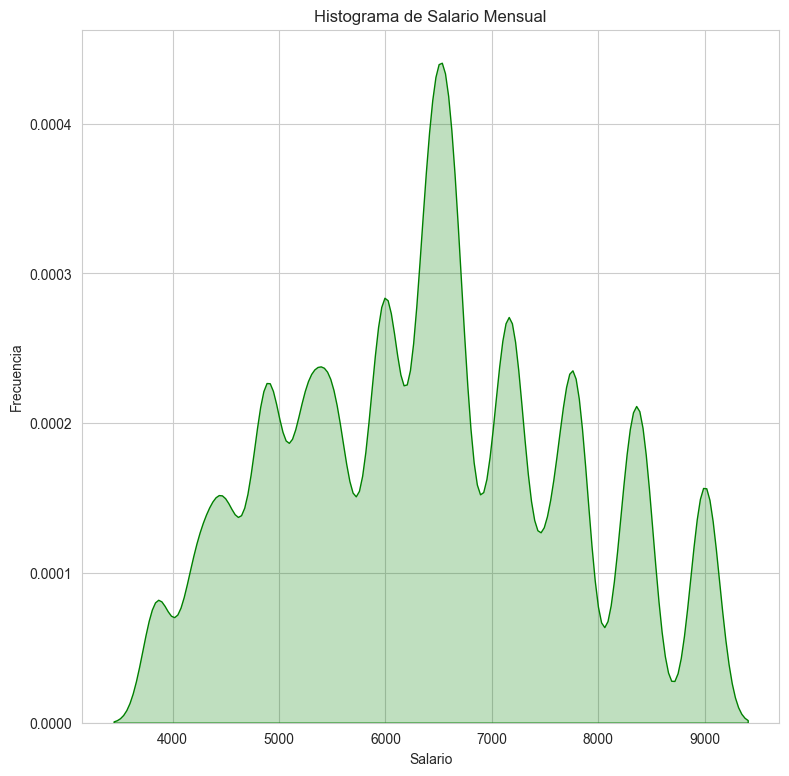

In [190]:
plt.figure(figsize=(9,9))

sns.kdeplot(df['Monthly_Salary'] , color='green' , fill=True)
plt.title('Histograma de Salario Mensual')
plt.xlabel('Salario')
plt.ylabel('Frecuencia')

plt.show()

Los salarios son muy variables, posiblemente se deba a que hay departamentos que ganan más o menos en comparación

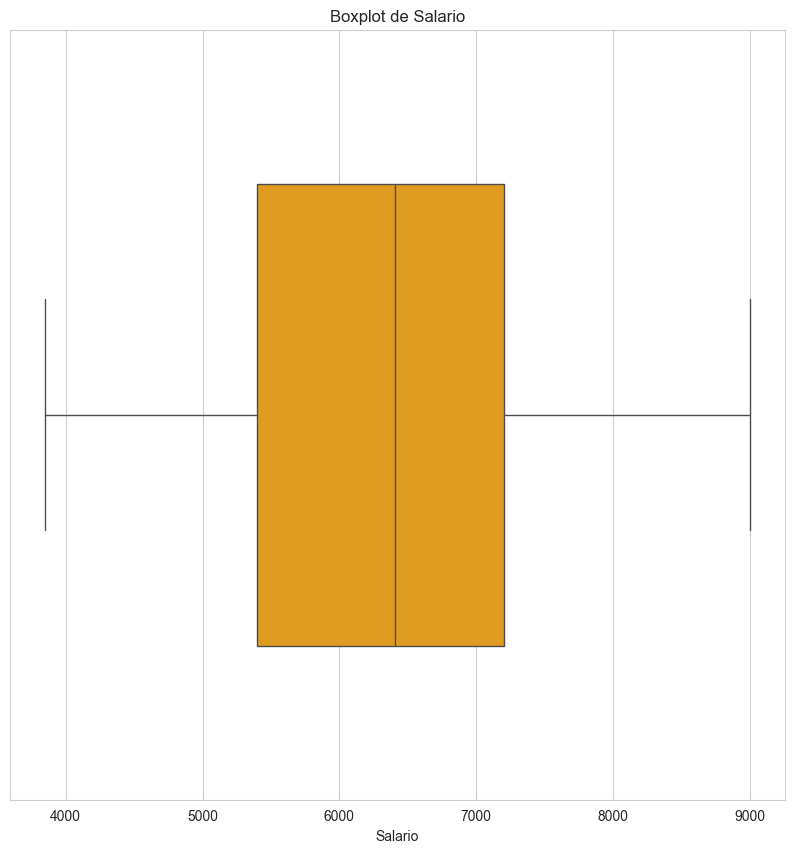

In [191]:
plt.figure(figsize=(10,10))
sns.boxplot(df['Monthly_Salary'] , color='orange' , orient='h' , width=0.6)

plt.title('Boxplot de Salario')
plt.xlabel('Salario')

plt.show()

No hay datos atipicos, la mayoria de empleados gana menos de 6500

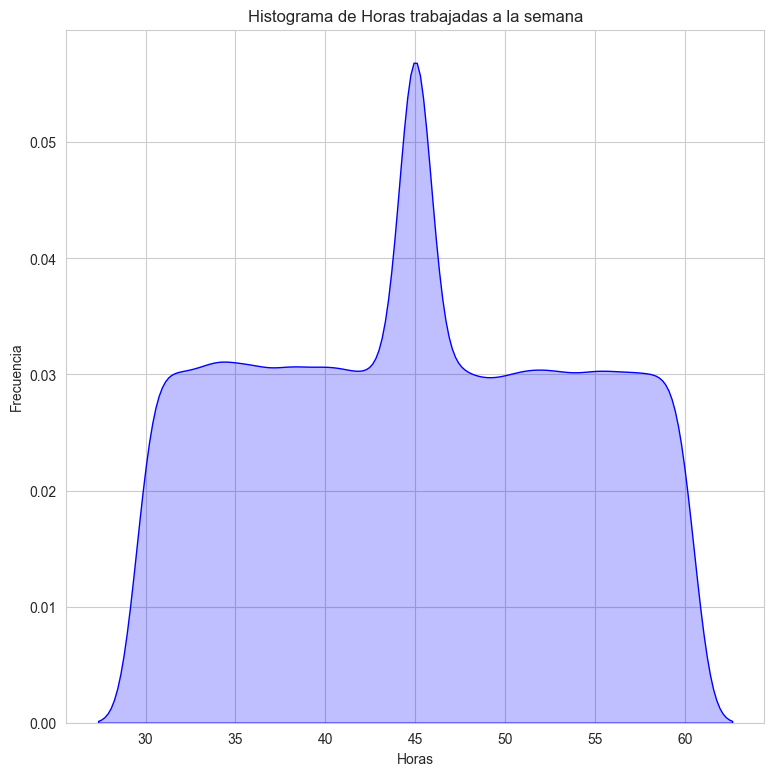

In [192]:
plt.figure(figsize=(9,9))

sns.kdeplot(df['Work_Hours_Per_Week'] , color='Blue' , fill=True)
plt.title('Histograma de Horas trabajadas a la semana')
plt.xlabel('Horas')
plt.ylabel('Frecuencia')

plt.show()

Las horas trabajadas se distribuyen de manera uniforme, sin embargo, existe un departamento o trabajadores que trabajan más que el resto

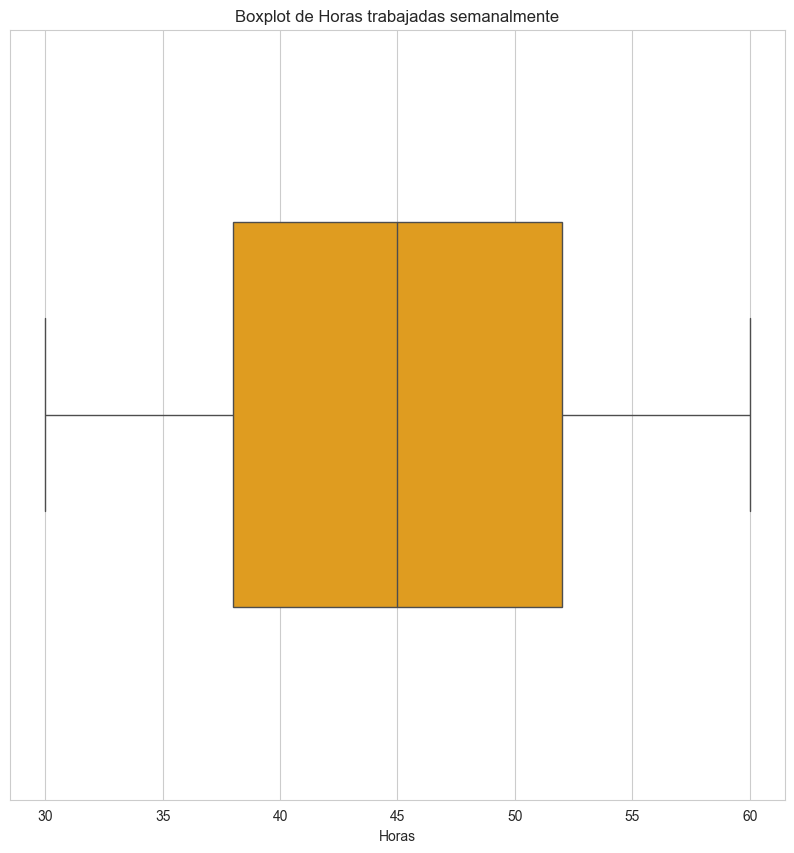

In [193]:
plt.figure(figsize=(10,10))
sns.boxplot(df['Work_Hours_Per_Week'] , color='orange' , orient='h' , width=0.5)

plt.title('Boxplot de Horas trabajadas semanalmente')
plt.xlabel('Horas')

plt.show()

No hay datos atipicos, la media está en 45 horas a la semana y la distribución es uniforme

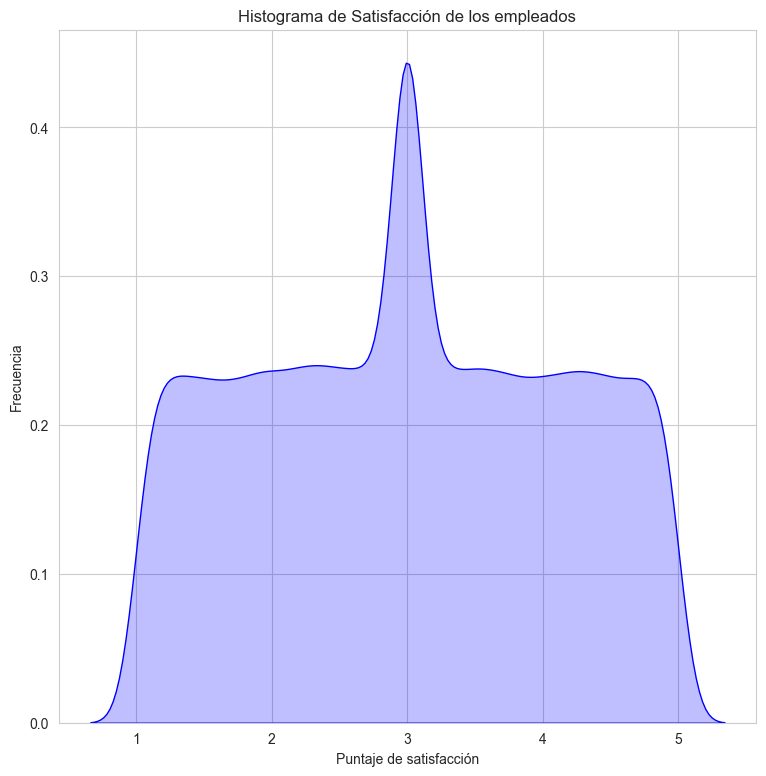

In [194]:
plt.figure(figsize=(9,9))

sns.kdeplot(df['Employee_Satisfaction_Score'] , color='Blue' , fill=True)
plt.title('Histograma de Satisfacción de los empleados')
plt.xlabel('Puntaje de satisfacción')
plt.ylabel('Frecuencia')

plt.show()

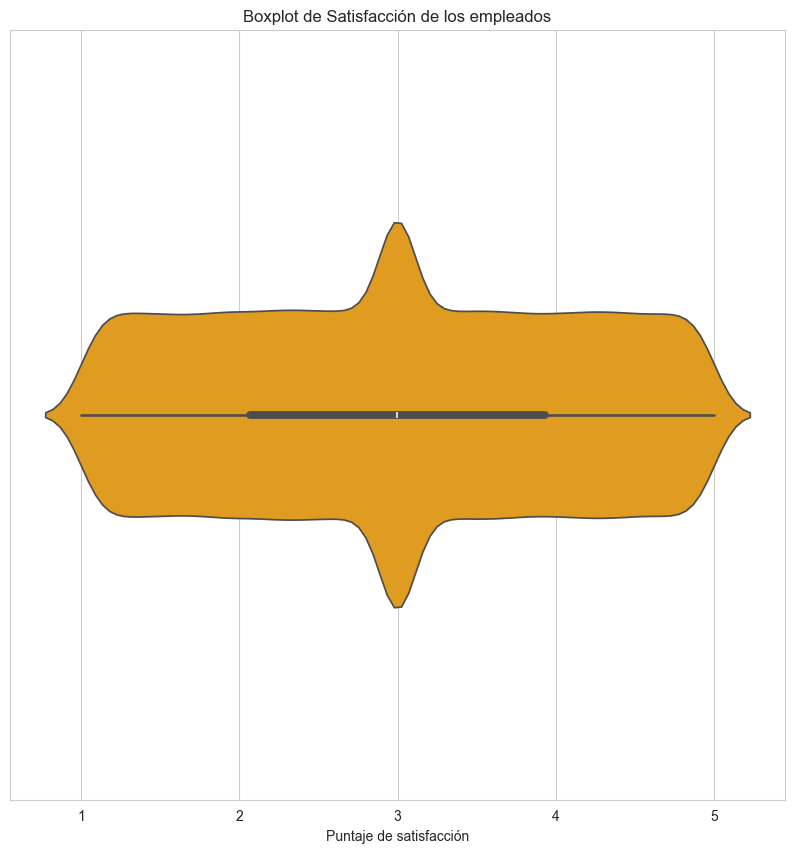

In [195]:
plt.figure(figsize=(10,10))
sns.violinplot(df['Employee_Satisfaction_Score'] , color='orange' , orient='h' , width=0.5)

plt.title('Boxplot de Satisfacción de los empleados')
plt.xlabel('Puntaje de satisfacción')

plt.show()

El promedio de satisfacción de los empleados es de 3, la distribución es uniforme, no hay datos atípicos

C:\Users\USER\AppData\Local\Temp\ipykernel_12376\2673124766.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




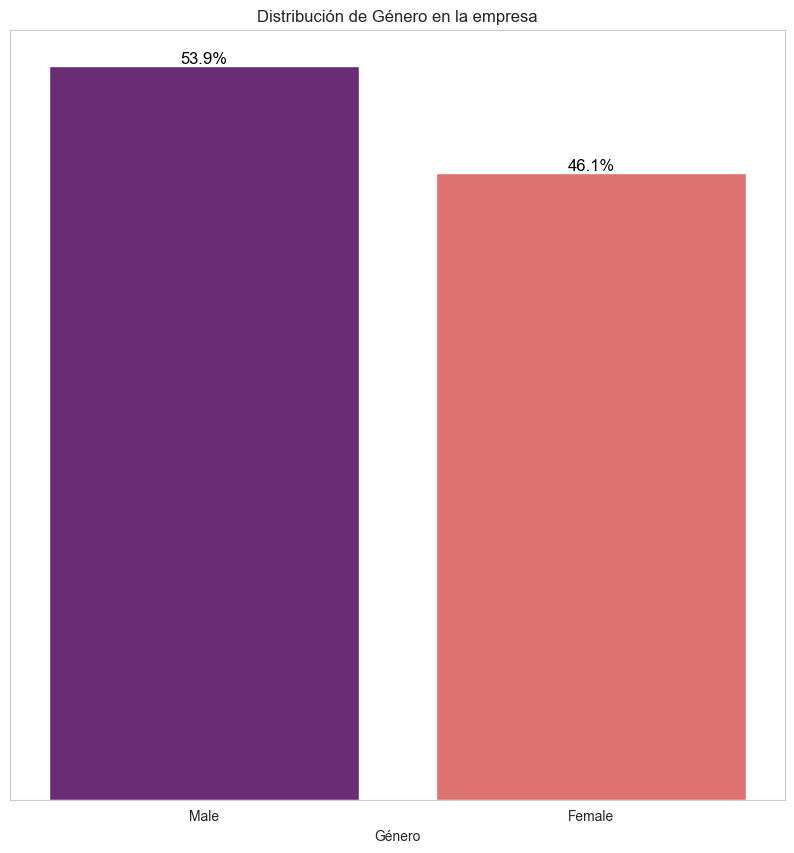

In [196]:
plt.figure(figsize=(10, 10))


ax = sns.countplot(x='Gender', data=df, palette='magma')


total = len(df)
for p in ax.patches:
    height = p.get_height()
    percentage = (height / total) * 100
    ax.text(p.get_x() + p.get_width() / 2, height + 0.02, f'{percentage:.1f}%', 
            ha='center', va='bottom', fontsize=12, color='black')

plt.title('Distribución de Género en la empresa')
plt.yticks([])
plt.ylabel('')
plt.xlabel('Género')
plt.show()

Hay más hombres que mujeres

C:\Users\USER\AppData\Local\Temp\ipykernel_12376\855333796.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




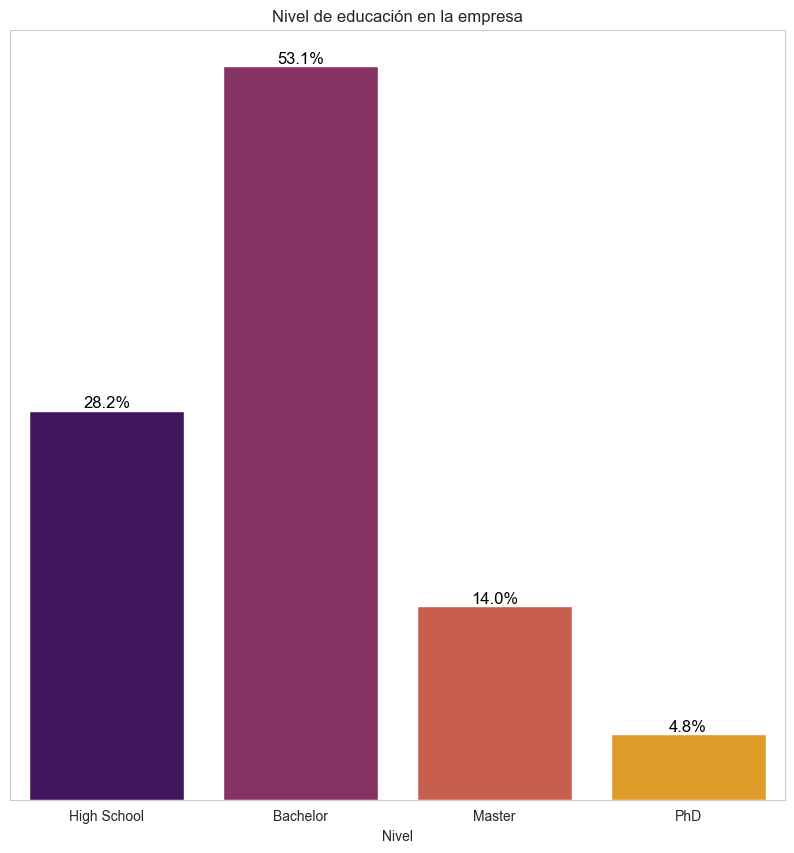

In [197]:
plt.figure(figsize=(10, 10))


ax = sns.countplot(x='Education_Level', data=df, palette='inferno')


total = len(df)
for p in ax.patches:
    height = p.get_height()
    percentage = (height / total) * 100
    ax.text(p.get_x() + p.get_width() / 2, height + 0.02, f'{percentage:.1f}%', 
            ha='center', va='bottom', fontsize=12, color='black')

plt.title('Nivel de educación en la empresa')
plt.yticks([])
plt.ylabel('')
plt.xlabel('Nivel')
plt.show()

La mayoría de empleados son licenciados

C:\Users\USER\AppData\Local\Temp\ipykernel_12376\2074686679.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




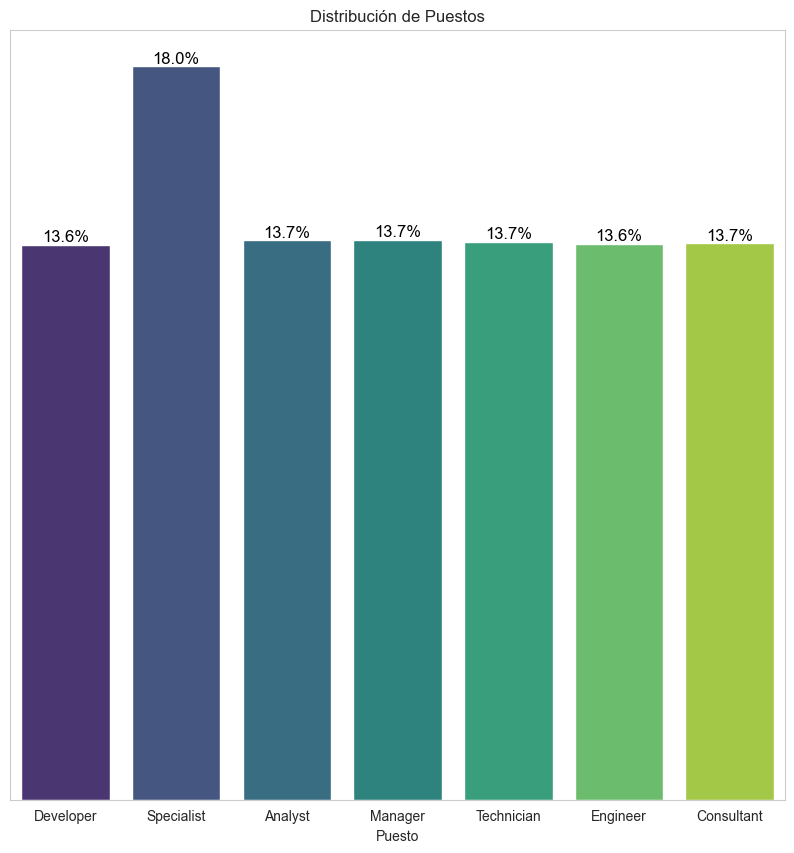

In [198]:
plt.figure(figsize=(10, 10))


ax = sns.countplot(x='Job_Title', data=df, palette='viridis')


total = len(df)
for p in ax.patches:
    height = p.get_height()
    percentage = (height / total) * 100
    ax.text(p.get_x() + p.get_width() / 2, height + 0.02, f'{percentage:.1f}%', 
            ha='center', va='bottom', fontsize=12, color='black')

plt.title('Distribución de Puestos')
plt.yticks([])
plt.ylabel('')
plt.xlabel('Puesto')
plt.show()

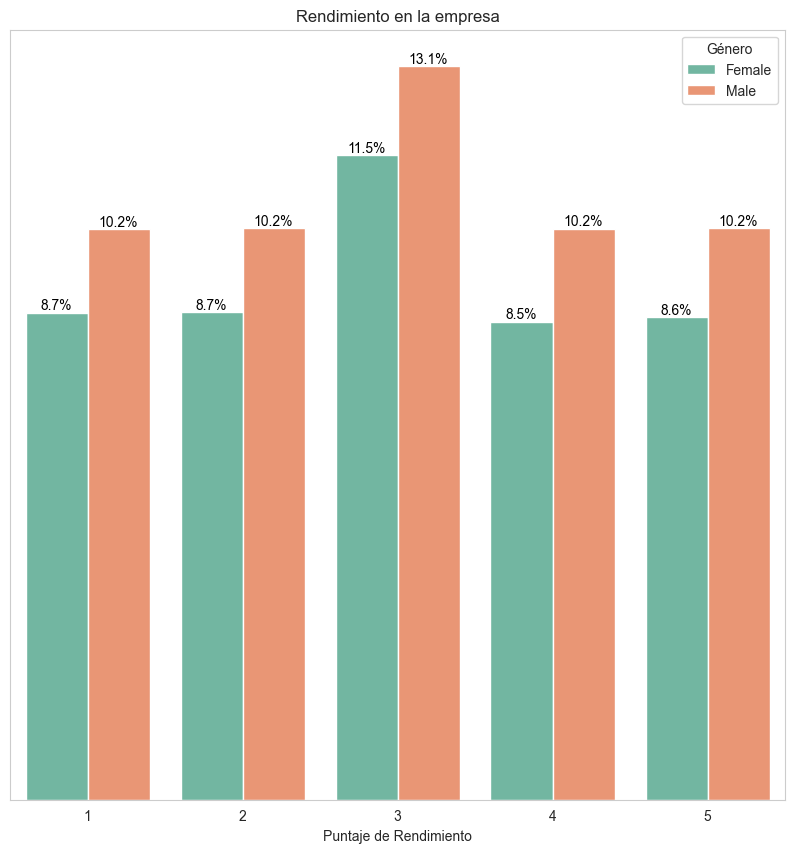

In [232]:
plt.figure(figsize=(10, 10))


ax = sns.countplot(x='Performance_Score', hue='Gender', data=df, palette='Set2')

total = len(df)

for p in ax.patches:
    height = p.get_height()
    if height > 0: 
        percentage = (height / total) * 100
        ax.text(p.get_x() + p.get_width() / 2, height + 0.02, f'{percentage:.1f}%', 
                ha='center', va='bottom', fontsize=10, color='black')

plt.title('Rendimiento en la empresa')
plt.yticks([])
plt.ylabel('')
plt.xlabel('Puntaje de Rendimiento')
plt.legend(title='Género')
plt.show()


El puntaje más común es de 3 

--------------------------------------------------------------------------------------------------------------------------------------------------------------

# Correlación entre Variables

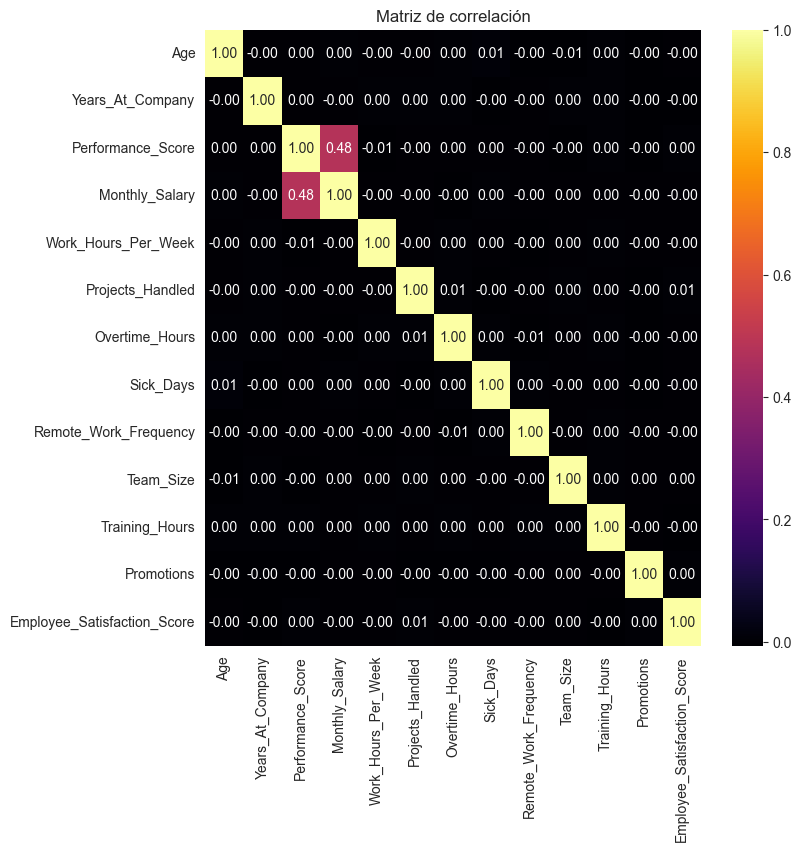

In [200]:
#Filtrando el df

df_num = df.select_dtypes(include=['integer' , 'floating'])

#Creando la matriz

matriz_corr = df_num.corr()

plt.figure(figsize=(8,8))

sns.heatmap(matriz_corr , annot=True , cmap='inferno' , fmt='.2f')

plt.title('Matriz de correlación')
plt.show()

Convirtiendo los str a números para hacer un análisis más completo

In [201]:
df_corr = df.copy()

df_corr['Hire_Date'] = pd.to_datetime(df['Hire_Date'])

columns_to_convert = ['Department', 'Gender', 'Job_Title', 'Education_Level','Resigned']
for col in columns_to_convert:
    df_corr[col] = df_corr[col].map({val: i for i, val in enumerate(df[col].unique())})

df_corr.dtypes


Department                              int64
Gender                                  int64
Age                                     int64
Job_Title                               int64
Hire_Date                      datetime64[ns]
Years_At_Company                        int64
Education_Level                         int64
Performance_Score                       int64
Monthly_Salary                          int64
Work_Hours_Per_Week                     int64
Projects_Handled                        int64
Overtime_Hours                          int64
Sick_Days                               int64
Remote_Work_Frequency                   int64
Team_Size                               int64
Training_Hours                          int64
Promotions                              int64
Employee_Satisfaction_Score           float64
Resigned                                int64
dtype: object

In [202]:
df_corr['Employee_Satisfaction_Score'] = df_corr['Employee_Satisfaction_Score'].round()
df_corr['Employee_Satisfaction_Score'] = df_corr['Employee_Satisfaction_Score'].astype(int)

In [203]:
df_corr

,Department,Gender,Age,Job_Title,Hire_Date,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned
0,0,0,29,0,2024-04-18 08:03:05.556036,0,0,5,7500,34,34,13,14,100,12,61,2,2,0
1,0,0,41,1,2015-10-26 08:03:05.556036,8,0,3,6404,37,27,6,3,50,10,1,0,3,0
2,1,1,48,2,2016-10-22 08:03:05.556036,7,1,2,4800,52,10,28,12,100,10,0,1,2,0
3,2,1,36,1,2021-07-23 08:03:05.556036,3,1,2,4800,38,11,29,13,100,15,9,1,1,0
4,3,0,43,3,2016-08-14 08:03:05.556036,8,0,3,7800,46,31,8,0,50,15,95,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92978,2,1,27,1,2019-07-23 08:03:05.556036,4,1,3,5400,40,29,4,1,75,13,50,0,5,0
92979,6,0,35,2,2017-08-29 08:03:05.556036,4,1,2,4800,45,15,0,10,75,16,75,2,2,0
92980,7,0,41,1,2015-02-01 08:03:05.556036,9,0,4,6300,59,49,18,11,100,4,34,1,3,0
92981,1,0,33,4,2016-10-22 08:03:05.556036,7,1,3,4550,34,39,20,2,100,3,9,0,3,0


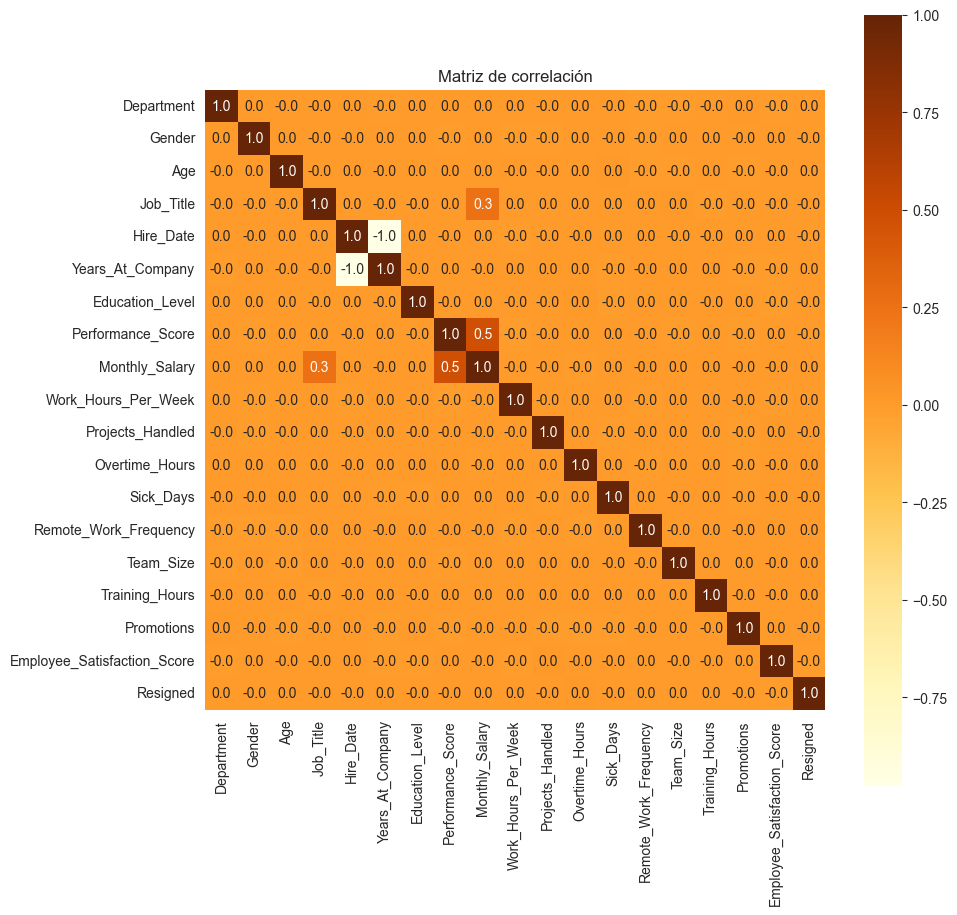

In [204]:

matriz_corr = df_corr.corr()

plt.figure(figsize=(10,10))

sns.heatmap(matriz_corr , annot=True , cmap='YlOrBr' , fmt='.1f' , square=True)

plt.title('Matriz de correlación')
plt.show()

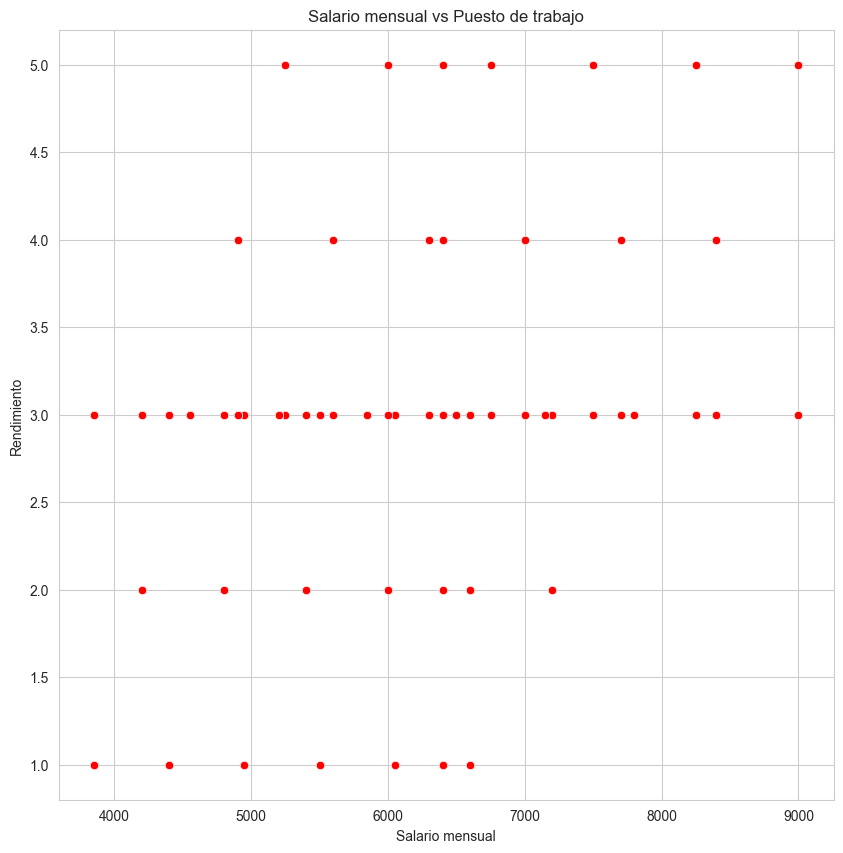

In [205]:
plt.figure(figsize=(10,10))

sns.set_style('whitegrid')
sns.scatterplot(data=df , y='Performance_Score' , x='Monthly_Salary' , color='red')
plt.title('Salario mensual vs Puesto de trabajo')
plt.ylabel('Rendimiento')
plt.xlabel('Salario mensual')

plt.show()

Como se mostro en la matriz de correlación, parece ser que solo el salario mensual influye en el rendimiento de los empleados

Quienes ganan más de 6500 suelen tener mejor rendimiento

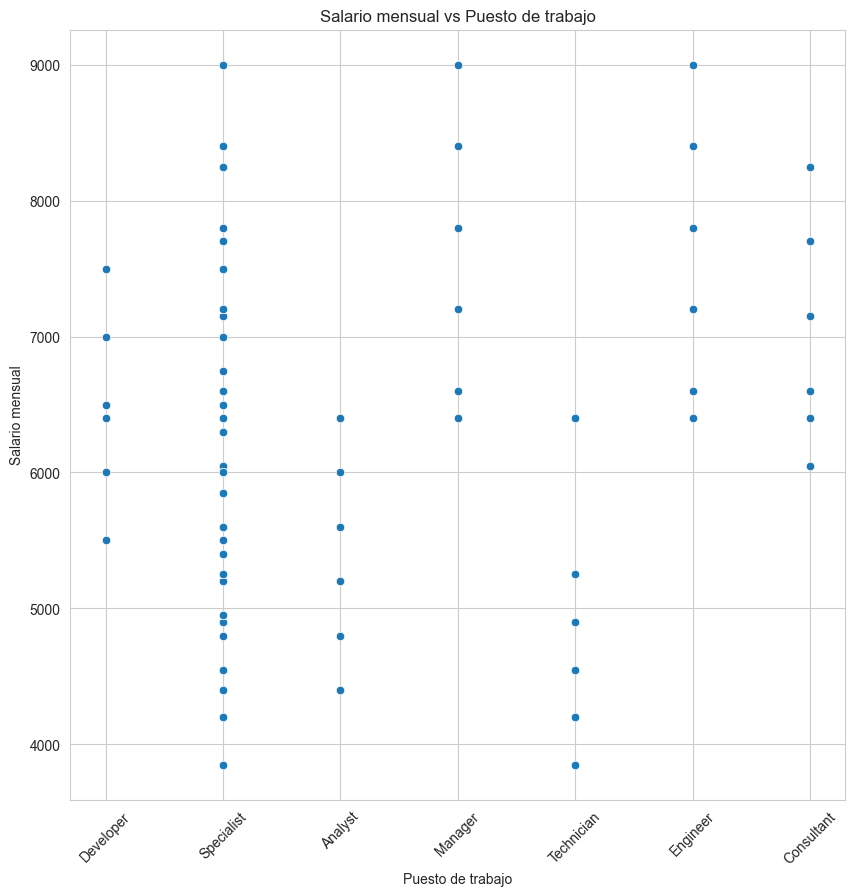

In [206]:
plt.figure(figsize=(10,10))

sns.set_style('whitegrid')
sns.scatterplot(data=df , x='Job_Title' , y='Monthly_Salary')
plt.title('Salario mensual vs Puesto de trabajo')
plt.xticks(rotation=45)
plt.xlabel('Puesto de trabajo')
plt.ylabel('Salario mensual')

plt.show()

Tomando en cuenta la relación del rendimiento con el salario, puede que exista una relación indirecta entre el rendimiento y el puesto

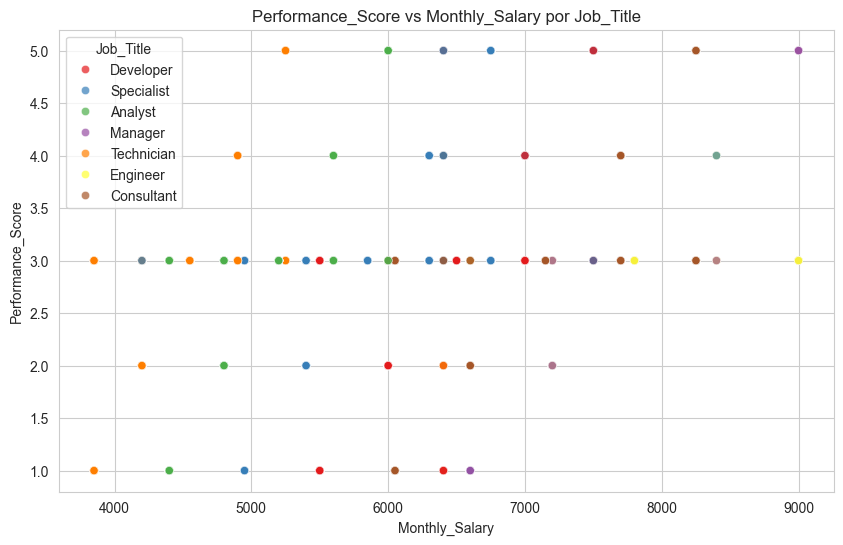

In [207]:

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Monthly_Salary', y='Performance_Score', hue='Job_Title', palette='Set1', alpha=0.7)
plt.title('Performance_Score vs Monthly_Salary por Job_Title')
plt.show()


Se puede observar que quienes suelen tener mejor rendimiento son los puestos con un salario mayor a 6500

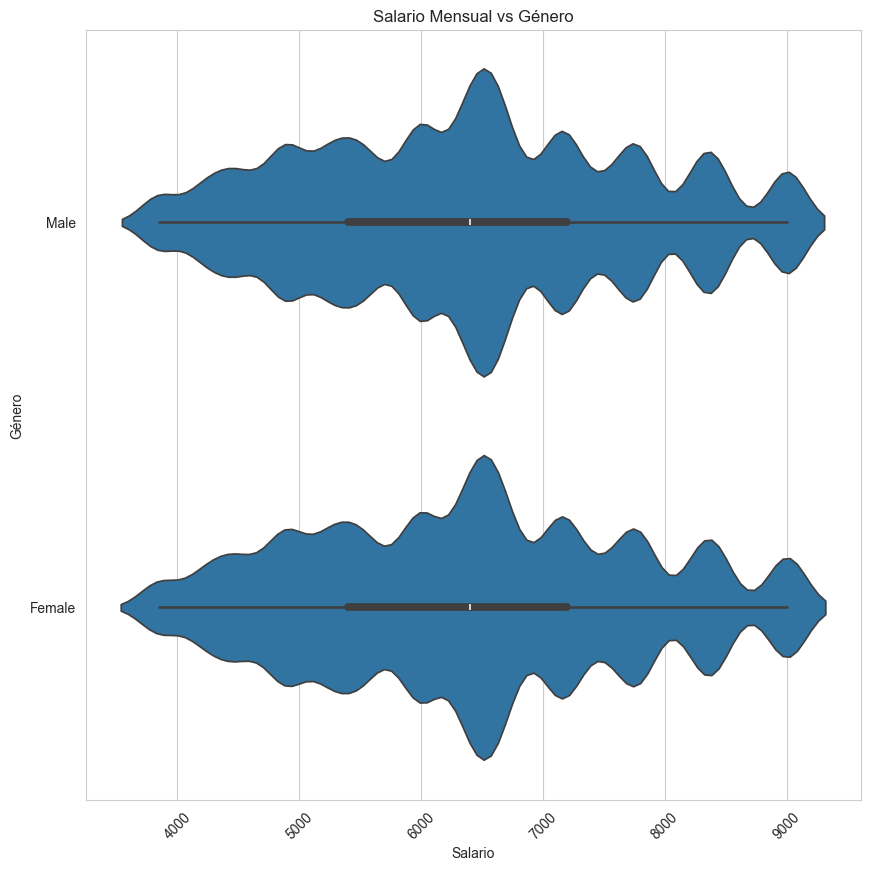

In [221]:
plt.figure(figsize=(10,10))

sns.set_style('whitegrid')
sns.violinplot(data=df , x='Monthly_Salary' , y='Gender')
plt.title('Salario Mensual vs Género')
plt.xticks(rotation=45)
plt.xlabel('Salario')
plt.ylabel('Género')

plt.show()

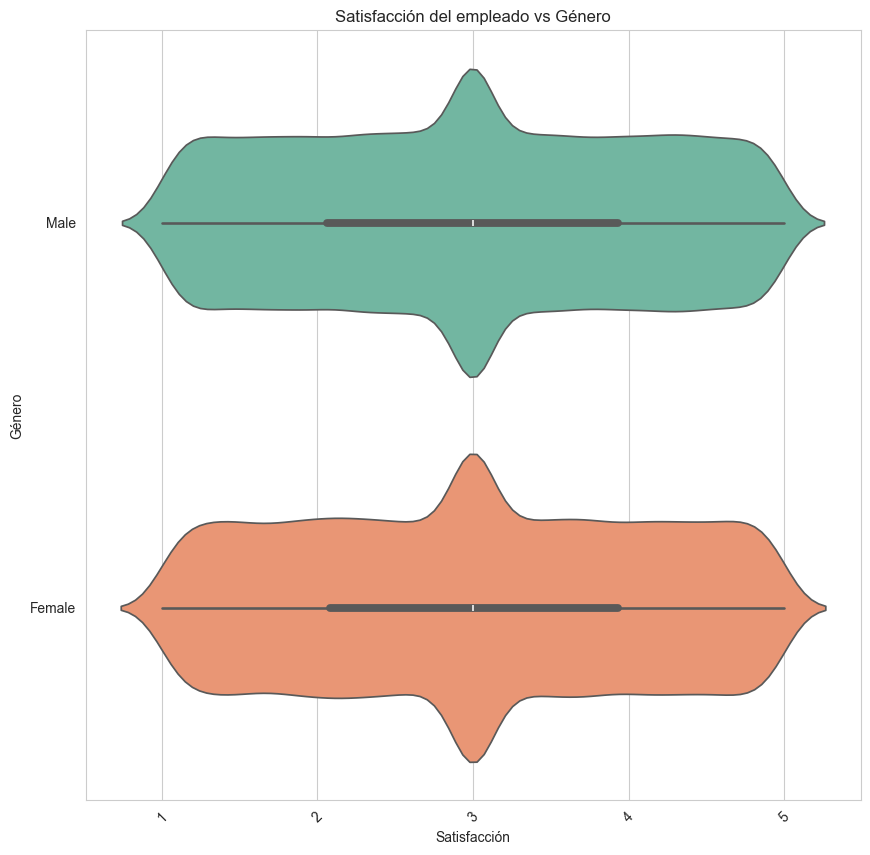

In [223]:
plt.figure(figsize=(10,10))

sns.set_style('whitegrid')
sns.violinplot(data=df , x='Employee_Satisfaction_Score' , y='Gender' , hue='Gender' , palette='Set2')
plt.title('Satisfacción del empleado vs Género')
plt.xticks(rotation=45)
plt.xlabel('Satisfacción')
plt.ylabel('Género')

plt.show()

## Análisis de Valores Faltantes


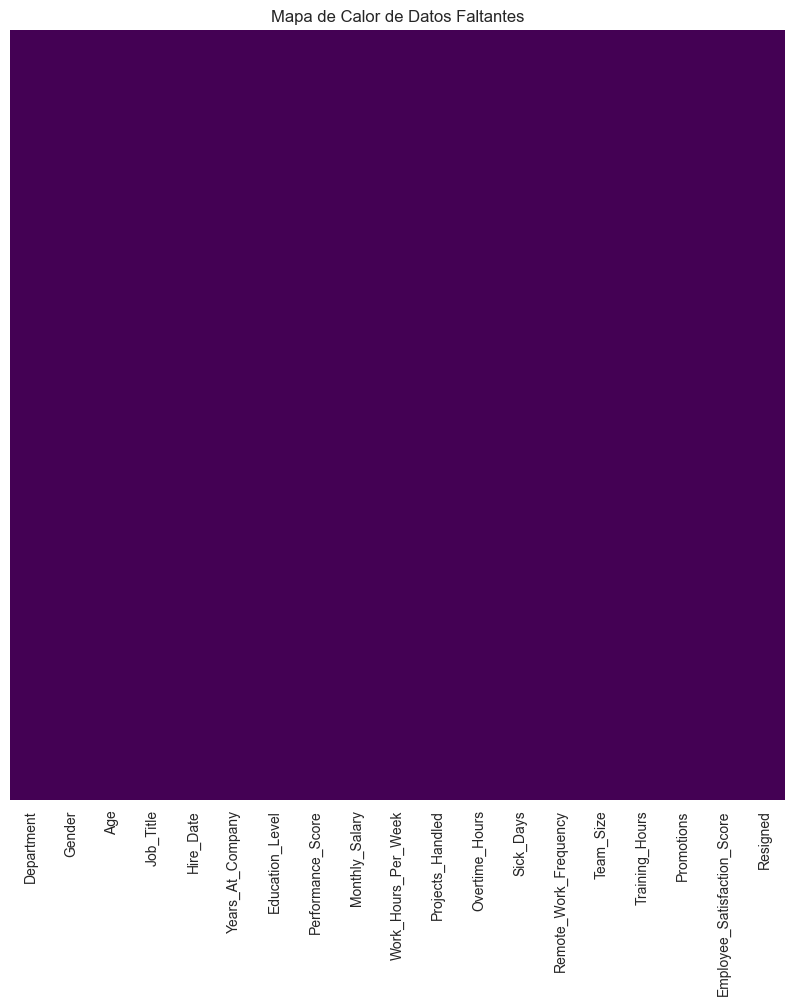

Porcentaje de valores faltantes por columna:
Department                     0.0
Gender                         0.0
Age                            0.0
Job_Title                      0.0
Hire_Date                      0.0
Years_At_Company               0.0
Education_Level                0.0
Performance_Score              0.0
Monthly_Salary                 0.0
Work_Hours_Per_Week            0.0
Projects_Handled               0.0
Overtime_Hours                 0.0
Sick_Days                      0.0
Remote_Work_Frequency          0.0
Team_Size                      0.0
Training_Hours                 0.0
Promotions                     0.0
Employee_Satisfaction_Score    0.0
Resigned                       0.0
dtype: float64


In [210]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title("Mapa de Calor de Datos Faltantes")
plt.show()

# Calcular y mostrar proporciones de valores faltantes por columna
porcentaje_faltante = df.isnull().mean() * 100
print("Porcentaje de valores faltantes por columna:")
print(porcentaje_faltante)


## Modelo de machine learning

In [211]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier , DecisionTreeRegressor, plot_tree , export_text , _tree
from sklearn import metrics

In [212]:
data = df_corr[['Performance_Score' , 'Job_Title' , 'Education_Level' , 'Gender' , 'Monthly_Salary']]
x = data.drop('Performance_Score' , axis=1)
y = data['Performance_Score']

In [213]:
#Dividir en entrenamiento y prueba

x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.3 , random_state=42)

In [214]:
model = DecisionTreeClassifier(random_state=42)
model.fit(x_train , y_train)

DecisionTreeClassifier(random_state=42)

In [215]:
y_pred = model.predict(x_test)

Presición: 0.91
Matriz ded Confusión
[[4987   52  181    7   40]
 [  60 5026  181   10   51]
 [ 360  405 5442  343  351]
 [  36   57  170 4840   36]
 [  40   59  168   16 4977]]


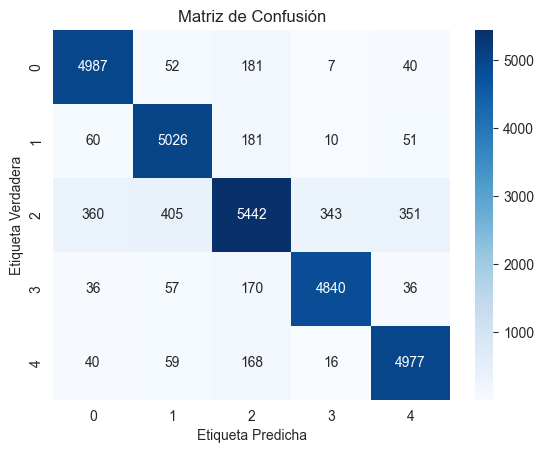

Tasa de Falsos Positivos: 0.01
Tasa de Falsos Negativos: 0.01


In [216]:
pres = metrics.accuracy_score(y_test , y_pred)
print(f'Presición: {pres:.2f}')

matriz = metrics.confusion_matrix(y_test , y_pred)
print('Matriz ded Confusión')
print(matriz)

sns.heatmap(matriz, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Etiqueta Verdadera')
plt.xlabel('Etiqueta Predicha')
plt.title('Matriz de Confusión')
plt.show()

false_positive_rate = matriz[0][1] / (matriz[0][0] + matriz[0][1])
false_negative_rate = matriz[1][0] / (matriz[1][0] + matriz[1][1])
print(f'Tasa de Falsos Positivos: {false_positive_rate:.2f}')
print(f'Tasa de Falsos Negativos: {false_negative_rate:.2f}')


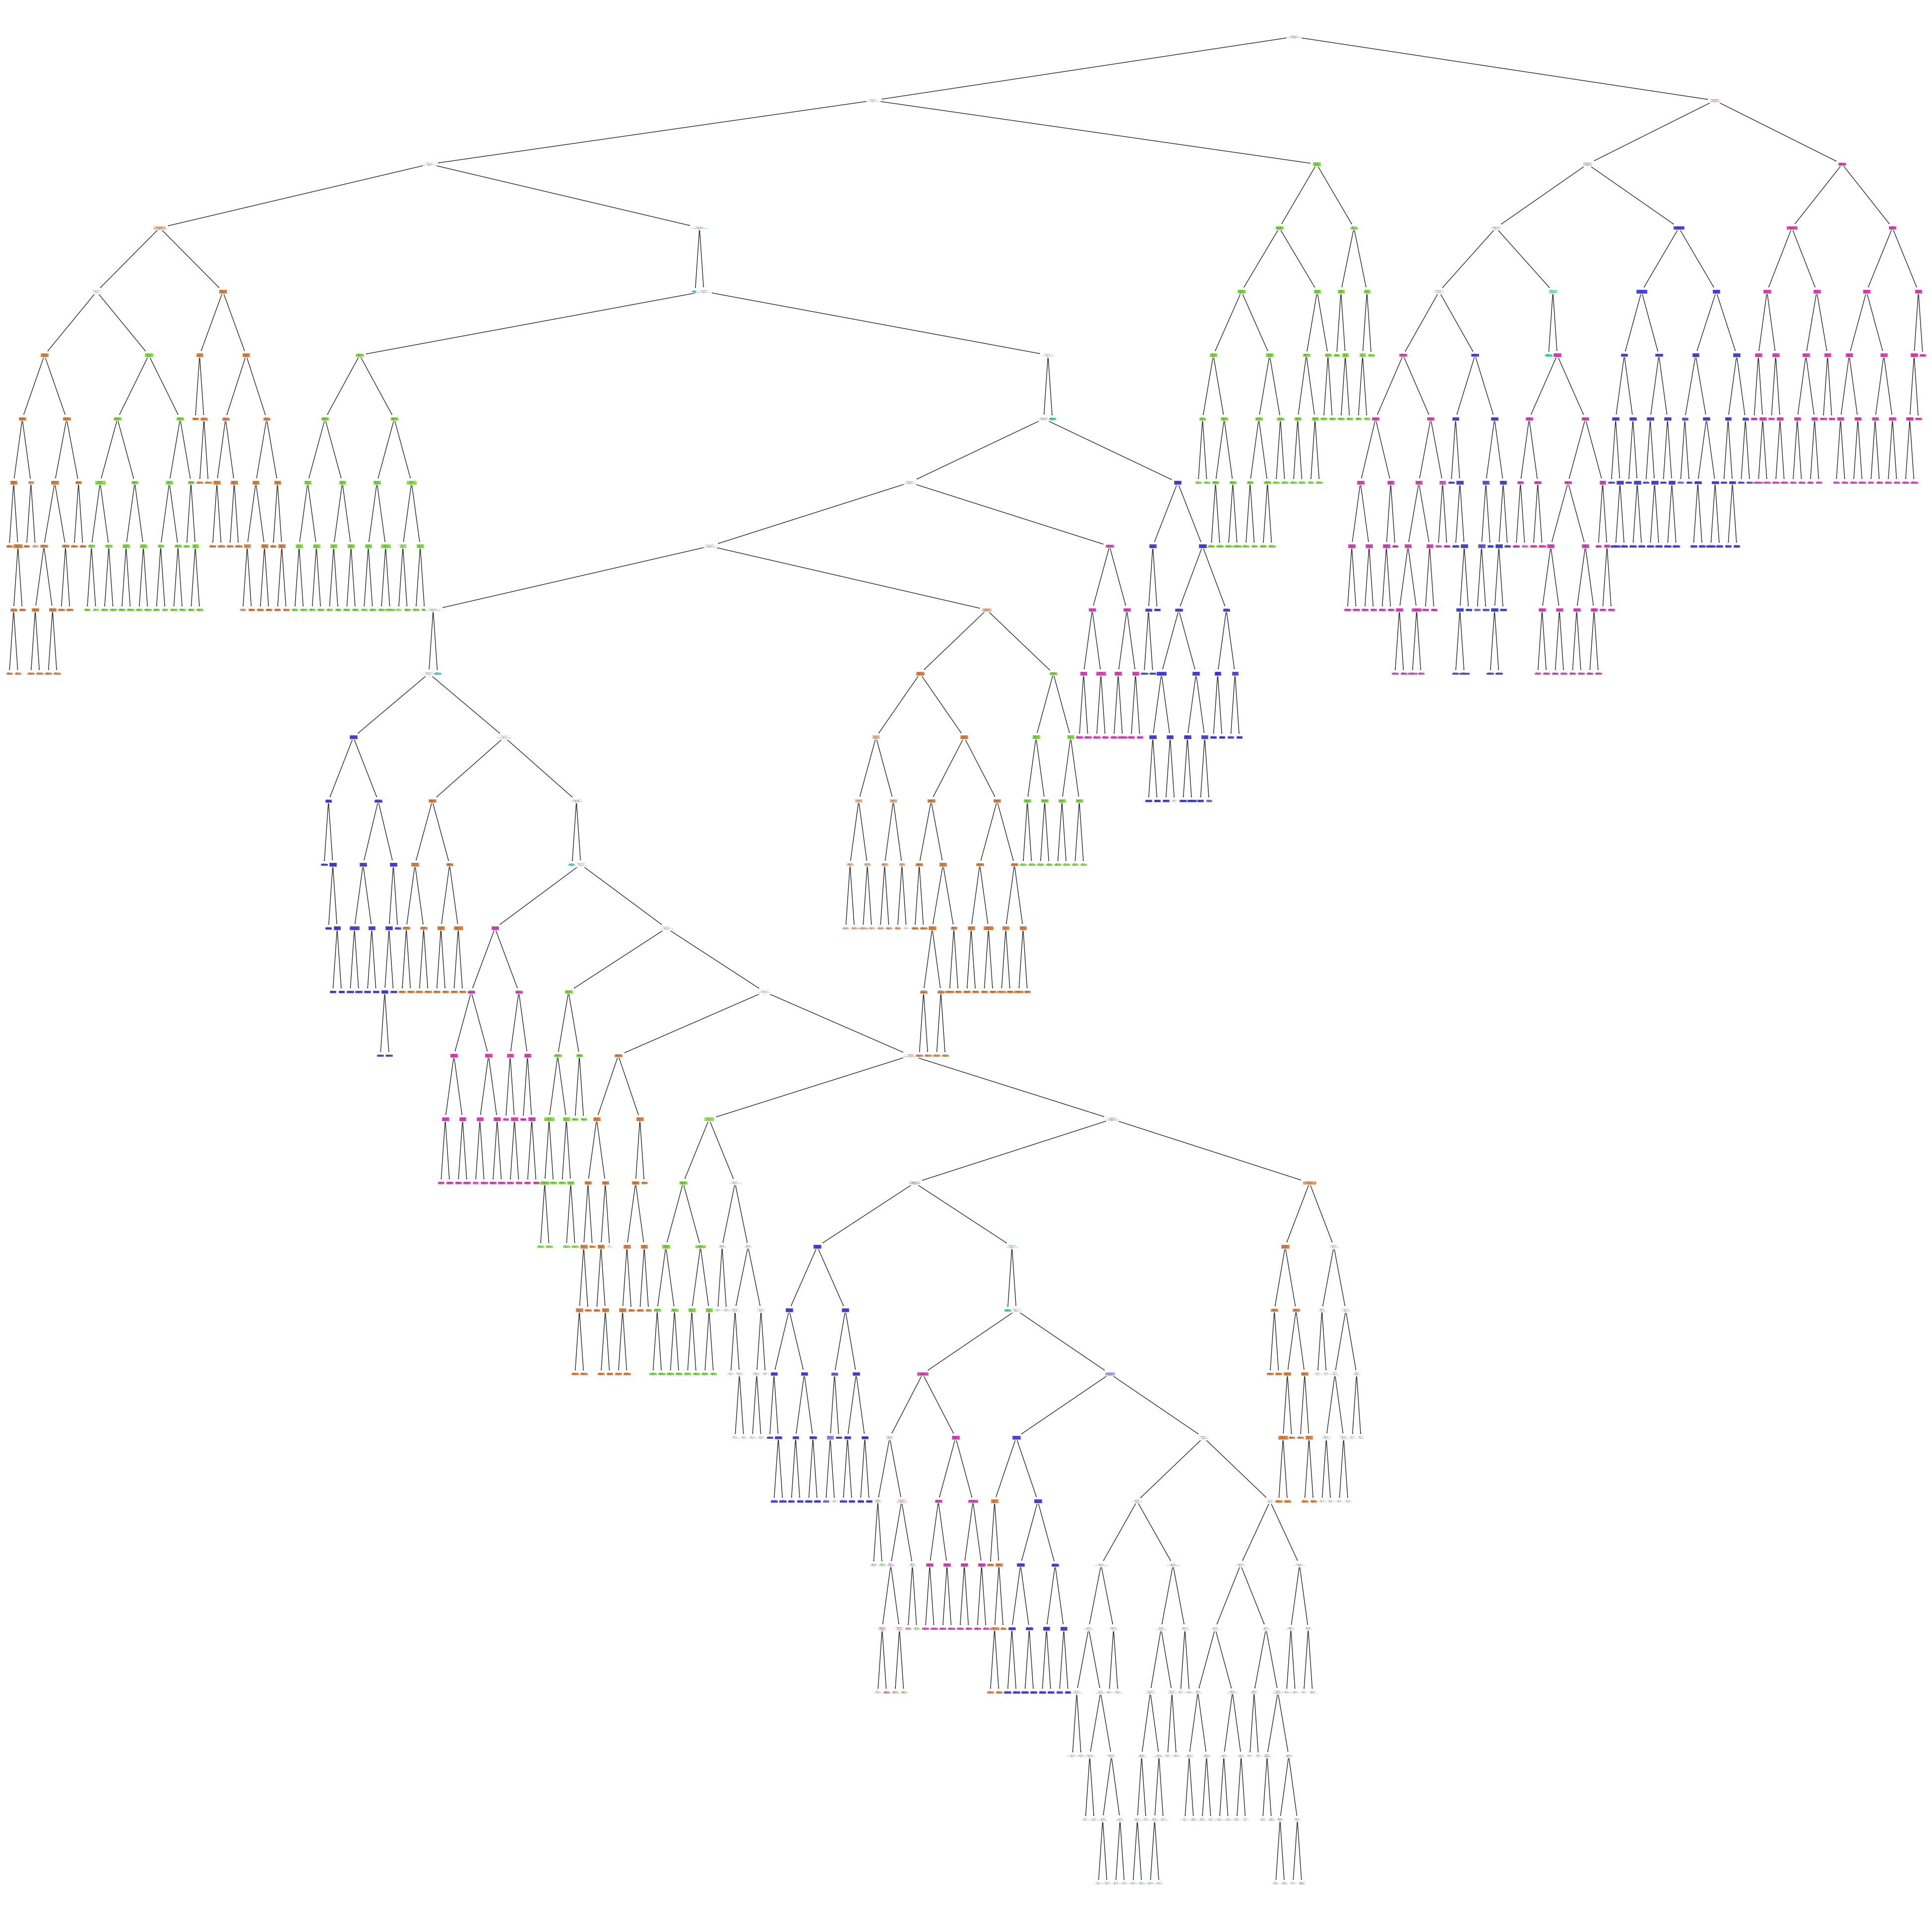

In [217]:
plt.figure(figsize=(50, 50))
plot_tree(model, filled=True, feature_names=x.columns, class_names=model.classes_.astype(str))
plt.show()

Se puede observar que los empleados que tiene un rendimiento mayor a 3 suelen tener un sueldo mayor a 7500


In [218]:
# Función para capturar los datos del trabajador
def capturar_datos(feature_names):
    datos_trabajador = []
    print("Introduce los valores de las características:")
    for feature in feature_names:
        valor = input(f"{feature}: ")
        try:
            valor = float(valor)
        except ValueError:
            print(f"Error: {feature} debe ser numérico. Inténtalo de nuevo.")
            return None
        datos_trabajador.append(valor)
    return np.array(datos_trabajador).reshape(1, -1)

In [219]:
# Características esperadas por el modelo
feature_names = ['Job_Title', 'Education_Level', 'Gender' , 'Monthly_Salary']

# Captura los datos del usuario
datos_trabajador = capturar_datos(feature_names)

if datos_trabajador is not None:
    # Predicción del rendimiento
    prediccion = model.predict(datos_trabajador)
    probabilidades = model.predict_proba(datos_trabajador)
    
    # Extraer la clase predicha y su probabilidad
    clase_predicha = int(prediccion[0])
    probabilidad_clase_predicha = probabilidades[0][clase_predicha - 1] * 100  # Convertir a porcentaje
    
    # Mostrar el resultado
    print(f"\nEl rendimiento predicho del trabajador es: {clase_predicha}")
    print(f"Probabilidad de esta predicción: {probabilidad_clase_predicha:.2f}%")
    
    # Mostrar las probabilidades de todas las clases
    print("\nProbabilidades de todas las clases:")
    for i, prob in enumerate(probabilidades[0], start=1):
        print(f"  - Clase {i}: {prob * 100:.2f}%")


Introduce los valores de las características:
Error: Job_Title debe ser numérico. Inténtalo de nuevo.


In [220]:
# Suponiendo que ya tienes este mapeo
columns_to_convert = ['Job_Title' , 'Gender' , 'Education_Level']

# Crear el diccionario invertido para cada columna
inverted_mapping = {}

for col in columns_to_convert:
    # Obtén el mapeo original y lo invierte
    original_mapping = {i: val for i, val in enumerate(df[col].unique())}
    inverted_mapping[col] = original_mapping

# Mostrar el diccionario invertido
print("Diccionario de mapeo invertido:")
for col, mapping in inverted_mapping.items():
    print(f"\n{col}: {mapping}")


Diccionario de mapeo invertido:

Job_Title: {0: 'Developer', 1: 'Specialist', 2: 'Analyst', 3: 'Manager', 4: 'Technician', 5: 'Engineer', 6: 'Consultant'}

Gender: {0: 'Male', 1: 'Female'}

Education_Level: {0: 'High School', 1: 'Bachelor', 2: 'Master', 3: 'PhD'}


In [233]:
df.to_csv('datos_productividad2.csv' , index=False)